In [34]:
%matplotlib inline


# Davis Club


Davis Southern Club Women

Shows how to make unipartite projections of the graph and compute the
properties of those graphs.

These data were collected by Davis et al. in the 1930s.
They represent observed attendance at 14 social events by 18 Southern women.
The graph is bipartite (clubs, women).


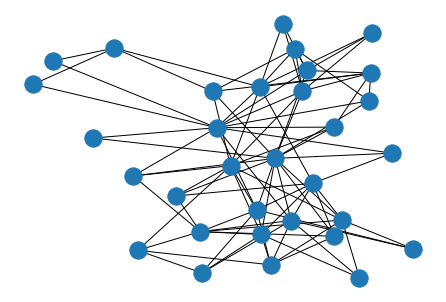

In [36]:
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.bipartite as bipartite
import plotly.graph_objects as go

G = nx.davis_southern_women_graph()
women = G.graph['top']
clubs = G.graph['bottom']

W = bipartite.weighted_projected_graph(G, women, ratio=False)

nx.draw(G)
plt.show()

In [37]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 32
Number of edges: 89
Average degree:   5.5625


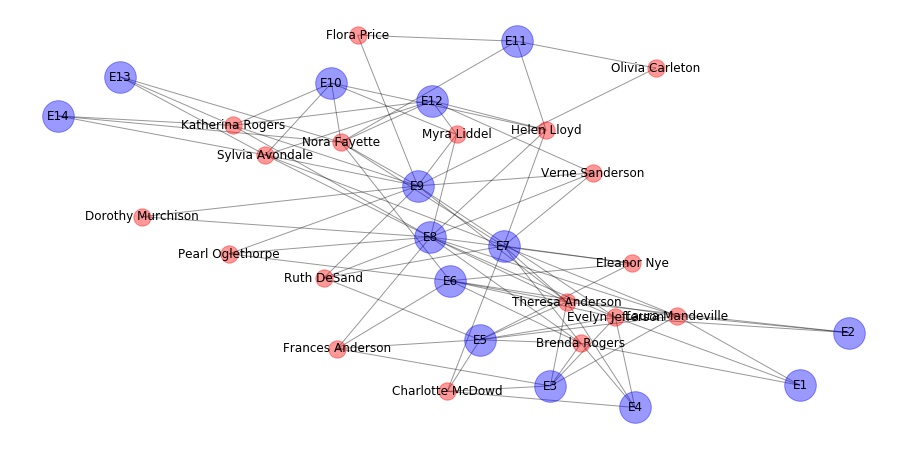

In [38]:
women = G.graph['top']
events = G.graph['bottom']
women, events = nx.bipartite.sets(G)

plt.rcParams["figure.figsize"] = (16,8)
plt.axis('off')
pos=nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, nodelist=women, node_color='red', alpha = 0.4)
nx.draw_networkx_nodes(G, pos, nodelist=events, node_color='blue', alpha = 0.4, node_size = 1000)
nx.draw_networkx_edges(G, pos, alpha = 0.4)
nx.draw_networkx_labels(G, pos);

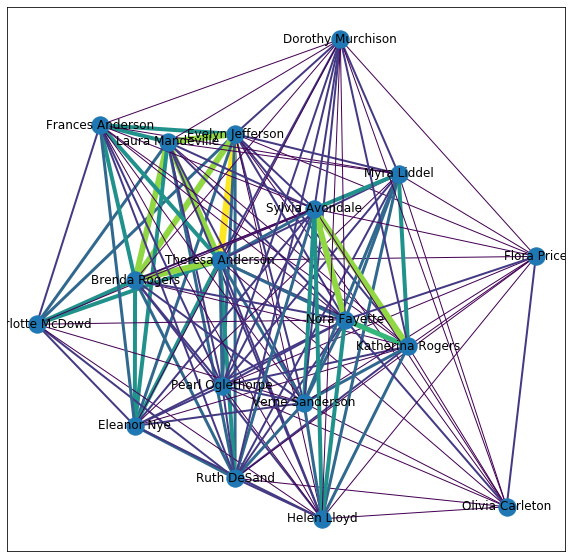

In [25]:
weights = [edata['weight'] for f,t,edata in W.edges(data=True)]
plt.figure(figsize = (10,10))
nx.draw_networkx(W, width=weights, edge_color=weights)

In [15]:
# Now we'll look at the events instead of the women

G2 = nx.davis_southern_women_graph()
women = G2.graph['bottom']
events = G2.graph['top']

# project bipartite graph onto women nodes
e = bipartite.projected_graph(G2, women)

# project bipartite graph onto women nodes keeping number of co-occurence
# the degree computed is weighted and counts the total number of shared contacts
e = bipartite.weighted_projected_graph(G2, women, ratio=False)

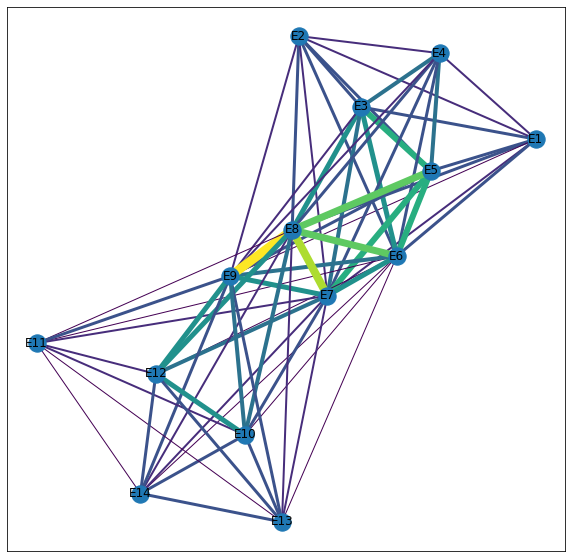

In [16]:
e.edges(data=True)
weights=[edata['weight'] for f,t,edata in e.edges(data=True)]
plt.figure(figsize=(10,10))
nx.draw_networkx(e, width=weights, edge_color=weights)